<a href="https://colab.research.google.com/github/ecarreram-blip/se-alesysistemas/blob/main/TALLER_2_S_Y_S_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESARROLLO TALLER 2

1.1 Consultar y realizar los ejercicios propuestos en el cuaderno Transformada de Fourier.

A) Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

R//

 Introducción

En el análisis de señales periódicas, los armónicos representan las componentes sinusoidales que componen una forma de onda compleja. Cada armónico es un múltiplo entero de la frecuencia fundamental (f₁), y su amplitud y fase determinan la forma exacta de la señal.

La Transformada Discreta de Fourier (DFT) permite descomponer una señal discreta x[n] en sus componentes de frecuencia. Sin embargo, su cálculo directo requiere O(N²) operaciones, lo cual es costoso para señales largas.

Para resolver esto, se utiliza la Transformada Rápida de Fourier (FFT), que es un algoritmo eficiente para calcular exactamente la DFT, pero con una complejidad reducida a O(N log N).

Modelo matemático

La DFT de una señal discreta x[n] de longitud N se define como:

X[k] = Σ (desde n=0 hasta N−1) [ x[n] · e^(−j2πkn/N) ], para k = 0, 1, 2, …, N−1

donde:
 • X[k] es el valor complejo que representa la magnitud y fase de la frecuencia fₖ
 • fₖ = k·Fs/N es la frecuencia asociada al bin k
 • Fs es la frecuencia de muestreo.

La FFT calcula exactamente los mismos coeficientes X[k], pero reorganizando las operaciones para evitar redundancias, logrando un aumento exponencial en la velocidad de cálculo.

Identificación de armónicos

En el espectro obtenido mediante la FFT:

El pico principal (máxima magnitud) corresponde a la frecuencia fundamental f₁.

Los picos sucesivos ubicados en múltiplos enteros de f₁ corresponden a los armónicos:

fₙ = n·f₁, para n = 2, 3, 4, …

El modelo armónico de una señal periódica puede expresarse como:

x(t) = A₁·sin(2πf₁t + φ₁) + A₂·sin(2π·2f₁t + φ₂) + … + A_N·sin(2π·Nf₁t + φ_N)

La FFT permite obtener los valores Aₙ y φₙ (amplitud y fase) de cada armónico directamente a partir del espectro X[k].

Ventajas del modelo FFT

Velocidad: Calcula la DFT en O(N log N), reduciendo drásticamente el tiempo de cómputo.

Precisión: Da resultados exactos (idénticos a la DFT).

Resolución en frecuencia: Controlada por N y Fs, ya que Δf = Fs / N.

Aplicaciones: Análisis espectral, detección de armónicos, filtrado digital, compresión de audio, entre otros.


A CONTINUACION Ejemplo práctico en Python

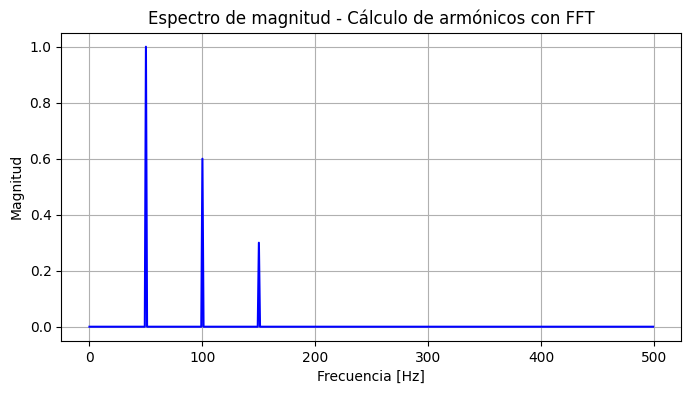

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
Fs = 1000       # Frecuencia de muestreo [Hz]
T = 1           # Duración [s]
t = np.linspace(0, T, int(Fs*T), endpoint=False)

# Señal con tres armónicos: 50Hz, 100Hz y 150Hz
x = 1.0*np.sin(2*np.pi*50*t) + 0.6*np.sin(2*np.pi*100*t) + 0.3*np.sin(2*np.pi*150*t)

# Cálculo de FFT
N = len(x)
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, 1/Fs)

# Magnitud (solo mitad positiva)
mag = np.abs(X[:N//2]) * 2 / N
freqs = freqs[:N//2]

# Gráfica del espectro
plt.figure(figsize=(8,4))
plt.plot(freqs, mag, 'b')
plt.title('Espectro de magnitud - Cálculo de armónicos con FFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


1.1

B) Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizando la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096).
Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.

R//:

Qué se observa en la gráfica

La línea roja (DFT sumatoria) crece rápidamente (tarda mucho más con señales grandes).

La línea azul (FFT) crece muy lentamente (procesa incluso 4096 muestras en milisegundos).

Esto demuestra que la FFT es muchísimo más eficiente, especialmente para señales largas.

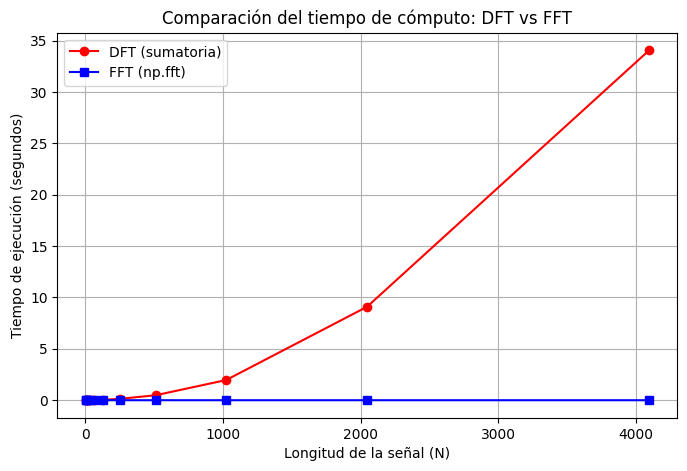

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Función que calcula la DFT directamente por sumatoria
def DFT_sumatoria(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Lista de longitudes a probar
N_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Listas para guardar los tiempos
tiempos_dft = []
tiempos_fft = []

# Bucle para cada longitud
for N in N_values:
    # Señal de prueba (una sinusoide simple)
    t = np.linspace(0, 1, N, endpoint=False)
    x = np.sin(2 * np.pi * 10 * t)

    # ---- DFT por sumatoria ----
    start = time.time()
    DFT_sumatoria(x)
    end = time.time()
    tiempos_dft.append(end - start)

    # ---- FFT ----
    start = time.time()
    np.fft.fft(x)
    end = time.time()
    tiempos_fft.append(end - start)

# ---- Gráfica comparativa ----
plt.figure(figsize=(8, 5))
plt.plot(N_values, tiempos_dft, 'r-o', label='DFT (sumatoria)')
plt.plot(N_values, tiempos_fft, 'b-s', label='FFT (np.fft)')
plt.xlabel('Longitud de la señal (N)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación del tiempo de cómputo: DFT vs FFT')
plt.legend()
plt.grid(True)
plt.show()


1.1

C) Realice el cálculo de la transformada discreta de Fourier mediante la estimación por sumatoria y mediante el algoritmo FFT para una misma señal de entrada.
Compare los resultados obtenidos gráficamente en magnitud y fase.

R//:

## Frecuencia de -3 dB — fórmulas

La ganancia en decibelios:
$$
G_{dB} = 20 \log_{10}\big(|H(f)|\big)
$$

Definición del punto -3 dB (amplitud):
$$
|H(f_{-3\text{dB}})| = \frac{1}{\sqrt{2}} \approx 0.7071
$$

Valor numérico en dB:
$$
20\log_{10}\!\left(\frac{1}{\sqrt{2}}\right) \approx -3.0103\ \text{dB} \quad(\text{aprox. } -3\ \text{dB})
$$

Relación con la potencia:
$$
P \propto |H(f)|^2 \quad\Rightarrow\quad P(f_{-3\text{dB}}) = \left(\frac{1}{\sqrt{2}}\right)^2 = \tfrac{1}{2}
$$

Respuesta en magnitud para un RC pasa-bajas (analítico):
$$
|H(f)| = \frac{1}{\sqrt{1 + (2\pi f R C)^2}}
$$

Condición de -3 dB para RC y frecuencia de corte:
$$
|H(f_c)| = \frac{1}{\sqrt{2}} \quad\Rightarrow\quad f_c = \frac{1}{2\pi R C}
$$

Para un filtro pasa-banda con dos cortes:
$$
\text{Ancho de banda: } BW = f_{c2} - f_{c1}
$$

Resumen: la frecuencia de corte \(f_c\) se toma como la frecuencia donde la ganancia cae \(-3\) dB (es decir \(1/\sqrt{2}\) en amplitud), marcando el límite entre banda pasante y banda de atenuación.


1.1

D)